# Study of events containing only two reconstructed jets

In this example, we access the reconstructed jet objects in `jets.core`, make di-jet combinations and look at the properties of the di-jets.

In [80]:
import sys,os
import uproot4 as uproot
import awkward1 as ak
import json
import numpy as np
import matplotlib.pyplot as plt
from fcc_python_tools.locations import loc
from fcc_python_tools import kinematics
from particle import literals as lp
from fcc_python_tools import plotting

from matplotlib import rc
rc('font',**{'family':'serif','serif':['Roman']})
rc('text', usetex=True)

file = uproot.open("/eos/experiment/fcc/ee/tmp/test.root")
tree = file['events']

Access the jets:

In [81]:
#Get all the variables in the tree
vars = tree.keys()

#Loacation of the reco particles
j_container = "Jet"
j_c = f'{j_container}/{j_container}'

#Keep the variables that aren't covMatrix
keep_vars = []
for v in vars:
    if("covMatrix" not in v and j_c in v):
        keep_vars.append(v)

j = tree.arrays(keep_vars,how="zip")
j[j_c,'p'] = kinematics.calc_p(j,j_c)

Count the number of jets in each event and plot:

Cut to select di-jet events, where we count the fraction of all events which contain only two jets:

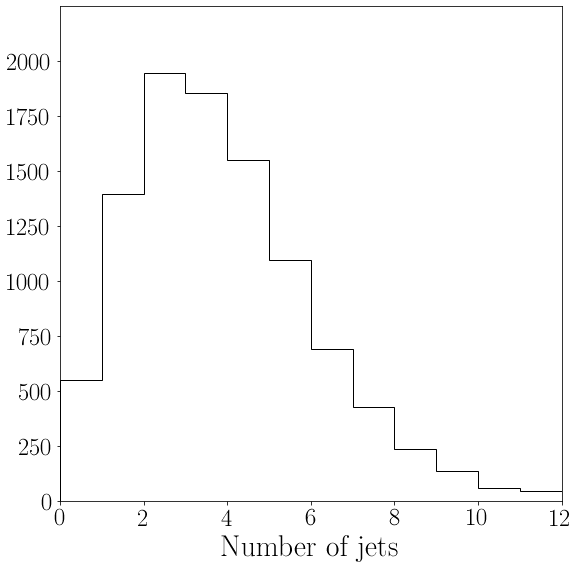

In [82]:
n_jets = ak.num(j[j_c])
plotting.hist_plot(n_jets,"n_jets","Number of jets",0,12,12)

Make di-jet combinations and look at their invariant mass and angle:

In [83]:
jet_pairs = ak.combinations(j[j_c],2)
j1, j2 = ak.unzip(jet_pairs)
j1_j2_angle = kinematics.cos_angle(j1, j2)
j1_j2_mass = kinematics.mass([j1, j2], [j1["mass"], j2["mass"]])

Plot the invariant mass of the di-jet:

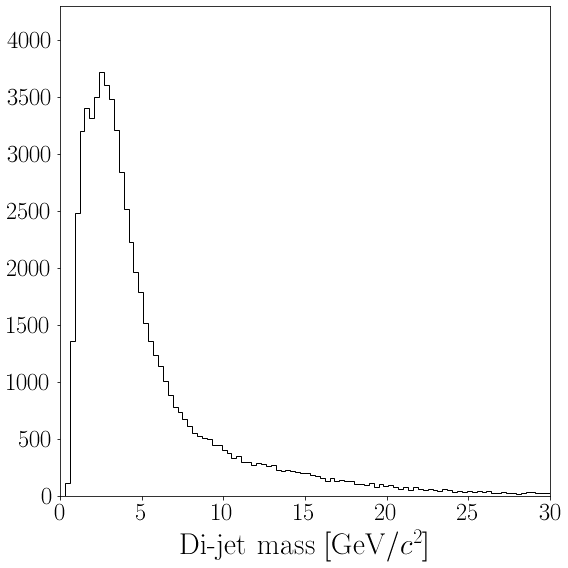

In [84]:
plotting.hist_plot(ak.flatten(j1_j2_mass),"dijet_mass","Di-jet mass [GeV/$c^2$]",0.,30.,100)

Next we plot the angle between the two jets:

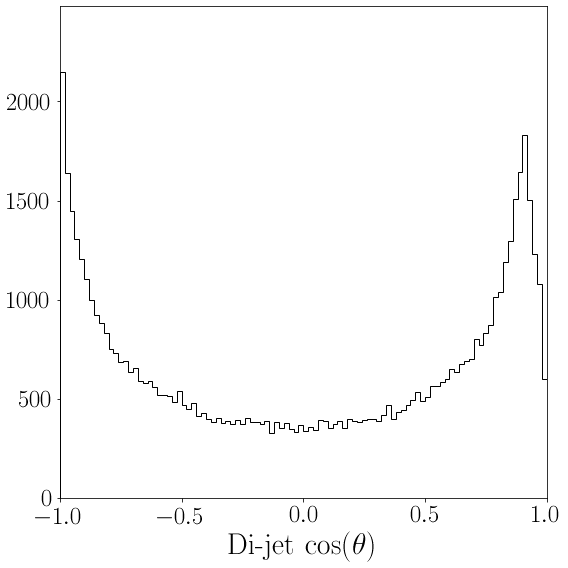

In [86]:
plotting.hist_plot(ak.flatten(j1_j2_angle),"dijet_angle","Di-jet $\\cos(\\theta)$",-1.,1,100)

Most of the jets are consistent with being colinear ($\cos(\theta)$ around 1) or back-to-back ($\cos(\theta)$ around -1). This is consistent with the production of several sub-jets along the direction of the two $b$-quarks, which are themselves produced back-to-back in the $Z^0$ decay.